In [1]:
#разкомментировать при первом запуске
#!git clone https://github.com/TimmmofeyD/rzhd_hack.git
#%cd rzhd_hack/
#%ls
#!pip install -U torch torchvision
#!pip install -U opencv-python-headless
#!git clone https://github.com/ultralytics/yolov5
#%cd yolov5
#!pip install -r requirements.txt
#%cd ..
#%ls

In [2]:
#обучить тоже можно 1 раз
#!python /content/rzhd_hack/yolov5/train.py --img 640 --batch 16 --epochs 50 --data /content/rzhd_hack/data.yaml --weights yolov5s.pt

In [3]:
#запустить при первом запуске
#!sudo apt update
#!sudo apt install tesseract-ocr
#!sudo apt install libtesseract-dev
#!sudo apt-get install tesseract-ocr-rus
#!pip install pytesseract
#!pip install easyocr
#!pip install deeppavlov

In [4]:
import torch
from PIL import Image
import cv2
import pytesseract
import matplotlib.pyplot as plt
from IPython.display import display
import easyocr
import numpy as np
import json
import os
from deeppavlov import configs, build_model
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

In [5]:
model = torch.hub.load('/content/rzhd_hack/yolov5/', 'custom', path='/content/rzhd_hack/yolov5/runs/train/exp/weights/best.pt', source='local')

YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [6]:
img_path = '/content/rzhd_hack/images/val/title_39.png'

In [7]:
results = model(img_path)

WARNING ⚠️ NMS time limit 0.550s exceeded


In [8]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 557x450 7 text_blocks
Speed: 25.7ms pre-process, 117.7ms inference, 1142.8ms NMS per image at shape (1, 3, 640, 544)

In [9]:
detected_blocks = results.xyxy[0].cpu().numpy()

In [10]:
image = Image.open(img_path)

In [11]:
#!pip install git+https://github.com/kmkurn/pytorch-crf.git
#!pip install torchcrf
#!pip install --upgrade torch transformers deeppavlov

In [12]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

reader = easyocr.Reader(['ru'])

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModelForTokenClassification.from_pretrained("DeepPavlov/rubert-base-cased")
nlp = pipeline("ner", model=model, tokenizer=tokenizer)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Detected text tesseract: ДА. 1. №@р4


Detected text easyOCR: ['~2 @<']

NER results: [{'entity': 'LABEL_1', 'score': 0.63648486, 'index': 1, 'word': 'ДА', 'start': 0, 'end': 2}, {'entity': 'LABEL_1', 'score': 0.62410295, 'index': 2, 'word': '.', 'start': 2, 'end': 3}, {'entity': 'LABEL_1', 'score': 0.5005305, 'index': 3, 'word': '1', 'start': 4, 'end': 5}, {'entity': 'LABEL_1', 'score': 0.61419564, 'index': 4, 'word': '.', 'start': 5, 'end': 6}, {'entity': 'LABEL_1', 'score': 0.6059089, 'index': 5, 'word': '№', 'start': 7, 'end': 8}, {'entity': 'LABEL_1', 'score': 0.57118493, 'index': 6, 'word': '@', 'start': 8, 'end': 9}, {'entity': 'LABEL_1', 'score': 0.6421644, 'index': 7, 'word': 'р', 'start': 9, 'end': 10}, {'entity': 'LABEL_1', 'score': 0.636071, 'index': 8, 'word': '##4', 'start': 10, 'end': 11}]
Entity: ~, Score: 0.5666263699531555
Entity: <, Score: 0.55584317445755
Entity: 2, Score: 0.5240768194198608


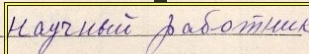

Detected text tesseract:  


Detected text easyOCR: ['[<ъ!', '<ол#']

NER results: []
Entity: [, Score: 0.6218482851982117
Entity: ъ, Score: 0.6205222606658936
Entity: <, Score: 0.5942704081535339


Detected text tesseract:  


Detected text easyOCR: []

NER results: []


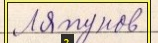

Detected text tesseract:  


Detected text easyOCR: ['ДЛ ~]]']

NER results: []
Entity: ], Score: 0.6858765482902527
Entity: ], Score: 0.5575380921363831
Entity: ~, Score: 0.5307164192199707


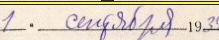

Detected text tesseract: 1. се по


Detected text easyOCR: ['саЧх']

NER results: [{'entity': 'LABEL_0', 'score': 0.56332546, 'index': 1, 'word': '1', 'start': 0, 'end': 1}, {'entity': 'LABEL_0', 'score': 0.5147416, 'index': 2, 'word': '.', 'start': 1, 'end': 2}, {'entity': 'LABEL_1', 'score': 0.50891, 'index': 3, 'word': 'се', 'start': 3, 'end': 5}, {'entity': 'LABEL_1', 'score': 0.60968167, 'index': 4, 'word': 'по', 'start': 6, 'end': 8}]
Entity: ##х, Score: 0.5155898332595825
Entity: са, Score: 0.509809672832489
Entity: ##Ч, Score: 0.5017554759979248


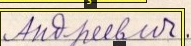

Detected text tesseract: М!


Detected text easyOCR: ['44Я-4ы ', '(с']

NER results: [{'entity': 'LABEL_1', 'score': 0.53430593, 'index': 1, 'word': 'М', 'start': 0, 'end': 1}, {'entity': 'LABEL_1', 'score': 0.730108, 'index': 2, 'word': '!', 'start': 1, 'end': 2}]
Entity: -, Score: 0.6183300614356995
Entity: с, Score: 0.577925980091095
Entity: (, Score: 0.5659539103507996


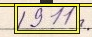

Detected text tesseract:  


Detected text easyOCR: []

NER results: []


In [13]:
for i, block in enumerate(detected_blocks):
    x1, y1, x2, y2, confidence, class_id = block
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

    cropped_img = image.crop((x1, y1, x2, y2))

    display(cropped_img)

    text = pytesseract.image_to_string(cropped_img, lang='rus')

    cropped_img_np = np.array(cropped_img)
    result_easy = reader.readtext(cropped_img_np, detail=0)

    ner_results_tesseract = nlp(text)

    text_easy = ' '.join(result_easy)
    ner_results_easy = nlp(text_easy)

    print(f'Detected text tesseract: {text}')
    print(f'\nDetected text easyOCR: {result_easy}')
    print(f'\nNER results: {ner_results_tesseract}')
    #print(f'\nNER results: {ner_results_easy}')
    top_n = 3
    sorted_results_easy = sorted(ner_results_easy, key=lambda x: x['score'], reverse=True)[:top_n]


    for result in sorted_results_easy:
      print(f'Entity: {result["word"]}, Score: {result["score"]}')

In [14]:
# Путь к файлу JSON с данными разметки
json_file = '/content/rzhd_hack/mark1_14_title.json'

# Папка с изображениями
image_folder = '/content/rzhd_hack/images/train'

# Создаем папку для сохранения обучающих данных
output_folder = 'training_data'
os.makedirs(output_folder, exist_ok=True)

# Чтение файла JSON
with open(json_file, 'r') as f:
    data = json.load(f)

# Обходим каждый элемент в JSON
for img_name, img_data in data.items():
    # Получаем путь к изображению
    img_path = os.path.join(image_folder, img_data['filename'])
    img = Image.open(img_path)

    # Создаем подпапку для изображения в обучающих данных
    img_folder = os.path.join(output_folder, img_name)
    os.makedirs(img_folder, exist_ok=True)

    # Сохраняем изображение
    img.save(os.path.join(img_folder, img_data['filename']))

    # Создаем текстовый файл для меток
    label_file = os.path.join(img_folder, f'{img_name}.txt')
    with open(label_file, 'w') as f:
        # Обходим каждую область разметки
        for region in img_data['regions']:
            # Получаем координаты прямоугольной области и соответствующий текст
            x = region['shape_attributes']['x']
            y = region['shape_attributes']['y']
            width = region['shape_attributes']['width']
            height = region['shape_attributes']['height']
            text = region['region_attributes']['text']

            # Записываем метку в текстовый файл в формате x, y, width, height, text
            f.write(f'{x},{y},{width},{height},"{text}"\n')

print('Извлечение и сохранение данных завершено.')

Извлечение и сохранение данных завершено.
